In [6]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Import functions from file
import sys, os
dir_path = os.path.dirname(os.path.realpath('functions.py'))
sys.path.append(str(dir_path)+'/')
from functions import *

### Import google sheet with wget

In [2]:
%%bash
wget "https://docs.google.com/spreadsheets/u/1/d/1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA/export?format=csv&id=1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA&gid=1901126947" -O example.csv

--2018-08-13 13:06:05--  https://docs.google.com/spreadsheets/u/1/d/1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA/export?format=csv&id=1hTYwrjFdEp5xUxz_LDA3ZmqB3ux1QMvU9GQsWcnbhCA&gid=1901126947
Resolving docs.google.com (docs.google.com)... 172.217.4.174, 2607:f8b0:4007:801::200e
Connecting to docs.google.com (docs.google.com)|172.217.4.174|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘example.csv’

     0K ...                                                    4.18M=0.001s

2018-08-13 13:06:05 (4.18 MB/s) - ‘example.csv’ saved [3343]



In [3]:
!ls

example.csv   Moal.ipynb   requirements.txt	     test.ipynb
functions.py  __pycache__  test_example_data.ipynb
julian.csv    README.md    test_google_sheets.ipynb


Loading csv into pandas dataframe

In [10]:
example = pd.read_csv('example.csv')
example.head()

,Task,Category,Date_Start,Time_Start,Date_End,Time_End,Time_Spent,Expected_Time_Spent,Update_Iterations
0,Edit_abstract,writing,2018-8-13,8:45,2018-8-13,9:07,0:22,0:10,0
1,Register_for_conference,other,2018-8-13,11:33,2018-8-13,11:59,0:26,0:30,0
2,Restore_Visibility,Experiment,2018-8-12,20:00,2018-8-12,22:10,2:10,2:00,0
3,Drug_Claims,Chores,2018-8-13,10:16,2018-8-13,12:40,2:24,2:00,0
4,Credit_Card,Chores,2018-8-13,11:41,2018-8-13,11:57,0:16,0:20,0


### Convert Time_Spent and Expected_Time to decimal format

In [5]:
time = example['Time_Spent'][0]
print(time)

0:22


In [6]:
decimal = convert_mins_to_decimal(str(time))
print(decimal)

0.36


Why when I do the following lambda function on `example_converted['Time_Spent']` does it also affect `example`???

In [7]:
example_converted = example
example_converted['Time_Spent_x'] = example_converted['Time_Spent'].apply(lambda time: convert_mins_to_decimal(str(time)))

In [8]:
example_converted.head()

,Task,Category,Date_Start,Time_Start,Date_End,Time_End,Time_Spent,Expected_Time_Spent,Update_Iterations,Time_Spent_x
0,Edit_abstract,writing,2018-8-13,8:45,2018-8-13,9:07,0:22,0:10,0,0.36
1,Register_for_conference,other,2018-8-13,11:33,2018-8-13,11:59,0:26,0:30,0,0.43
2,Restore_Visibility,Experiment,2018-8-12,20:00,2018-8-12,22:10,2:10,2:00,0,2.16
3,Drug_Claims,Chores,2018-8-13,10:16,2018-8-13,12:40,2:24,2:00,0,2.40
4,Credit_Card,Chores,2018-8-13,11:41,2018-8-13,11:57,0:16,0:20,0,0.26


In [9]:
example.head()

,Task,Category,Date_Start,Time_Start,Date_End,Time_End,Time_Spent,Expected_Time_Spent,Update_Iterations,Time_Spent_x
0,Edit_abstract,writing,2018-8-13,8:45,2018-8-13,9:07,0:22,0:10,0,0.36
1,Register_for_conference,other,2018-8-13,11:33,2018-8-13,11:59,0:26,0:30,0,0.43
2,Restore_Visibility,Experiment,2018-8-12,20:00,2018-8-12,22:10,2:10,2:00,0,2.16
3,Drug_Claims,Chores,2018-8-13,10:16,2018-8-13,12:40,2:24,2:00,0,2.40
4,Credit_Card,Chores,2018-8-13,11:41,2018-8-13,11:57,0:16,0:20,0,0.26


[1.02956755]
[[0.0017018]]


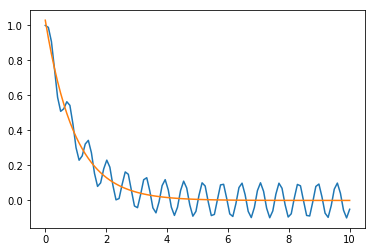

In [8]:
#fitting with scipy
fake_data_x = np.linspace(0, 10, 100)
fake_data_y = np.exp(-np.linspace(0, 10, 100)) + 0.1*np.sin(10*np.linspace(0, 10, 100))

def fit_func(t, r):
    return r * np.exp(-r * t) #this is an exponential distribution, but it could be anything

fit_est, fit_cov = curve_fit(fit_func, fake_data_x, fake_data_y)
print(fit_est)
print(fit_cov)

plt.figure()
plt.plot(fake_data_x, fake_data_y)
plt.plot(fake_data_x, fit_func(fake_data_x, fit_est[0]))
plt.show()
